In [108]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

Коэффициенты при N = 2 равны: [ 3.55745002e+10 -3.83202593e+07  1.03367964e+04]
Отличие от настоящего значения в 2010 году: 3997293.2333450317


Коэффициенты при N = 3 равны: [ 3.35841105e+11 -4.99205216e+08  2.46113702e+05 -4.02006660e+01]
Отличие от настоящего значения в 2010 году: 548075.8264160156


Коэффициенты при N = 4 равны: [-3.21052699e+12  6.75900975e+09 -5.32405394e+06  1.85950077e+03 -2.42937676e-01]
Отличие от настоящего значения в 2010 году: -291775.91748046875


Коэффициенты при N = 5 равны: [-1.18137719e+13  2.08044247e+10 -1.15467605e+07  8.74243755e+02  1.07517972e+00 -2.43893176e-04]
Отличие от настоящего значения в 2010 году: -3973595.44140625


Минимум отличия достигается при N = 4


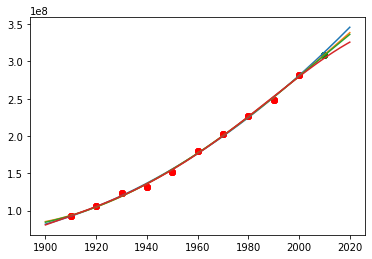

In [109]:
# Пункт a

x = np.array([1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000], dtype = "float64")
y = np.array([92228496, 106021537, 123202624, 132164569, 151325798, 179323175, 203211926, 226545805, 248709873, 281421906], dtype = "float64")
N_array = np.array([2, 3, 4, 5])
koef = 0

def Gauss(A_extended, n):
    u = np.zeros(n + 1, dtype = "float64")

    for i in range(0, n):
        for j in range(i + 1, n + 1):
            A_extended[j] = A_extended[j] - A_extended[j][i] / A_extended[i][i] * A_extended[i]

    for i in range(n, -1, -1):
        u[i] = 1 / A_extended[i, i] * (A_extended[i, -1] - u @ A_extended[i, :-1])

    r = ((A_extended[:, :-1] @ u - A_extended[:, -1]) @ (A_extended[:, :-1] @ u - A_extended[:, -1])) ** 0.5
    
    return u
for N in N_array:
    A_extended = np.zeros((N + 1, N + 2), dtype = "float64")
    for k in range(0, N + 1):
        for n in range(0, N + 1):
            A_extended[k, n] = np.sum(x**(n + k))
        A_extended[k, -1] = y @ x ** k
    koef = Gauss(A_extended, N)
    print(f"Коэффициенты при N = {N} равны: {koef}")
    print(f"Отличие от настоящего значения в 2010 году: {np.sum([koef[n] * 2010 ** n for n in range(0, N + 1)], axis=0) - 308473043}")
    print("\n")

    l = np.linspace(1900, 2020, num=100000)

    plt.scatter(x, y, c="r")
    plt.scatter(2010, 308473043, c="g")
    plt.plot(l, np.sum([koef[n] * l ** n for n in range(0, N + 1)], axis=0))
    
print("Минимум отличия достигается при N = 4")

Коэффициенты при N = 2 равны: [1.65887714e+08 2.09661478e+06 1.03367964e+04]
Отличие от настоящего значения в 2010 году: 3997293.233333349


Коэффициенты при N = 3 равны: [ 1.65887714e+08  2.15551115e+06  1.03367964e+04 -4.02022941e+01]
Отличие от настоящего значения в 2010 году: 547936.4000000358


Коэффициенты при N = 4 равны: [ 1.65421570e+08  2.15551115e+06  1.23167929e+04 -4.02022941e+01 -9.65851952e-01]
Отличие от настоящего значения в 2010 году: -2766867.5


Коэффициенты при N = 5 равны: [ 1.65421570e+08  2.46400145e+06  1.23167929e+04 -6.70708267e+02 -9.65851952e-01  2.44066828e-01]
Отличие от настоящего значения в 2010 году: 32134688.933333695


Минимум отличия достигается при N = 3


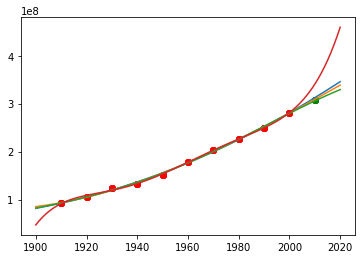

In [110]:
# Пункт г

for N in N_array:
    A_extended = np.zeros((N + 1, N + 2), dtype = "float64")
    for k in range(0, N + 1):
        for n in range(0, N + 1):
            A_extended[k, n] = np.sum((x - 1955)**(n + k))
        A_extended[k, -1] = y @ (x - 1955) ** k
    koef = Gauss(A_extended, N)
    print(f"Коэффициенты при N = {N} равны: {koef}")
    print(f"Отличие от настоящего значения в 2010 году: {np.sum([koef[n] * (2010 - 1955) ** n for n in range(0, N + 1)], axis=0) - 308473043}")
    print("\n")

    l = np.linspace(1900, 2020, num=100000)

    plt.scatter(x, y, c="r")
    plt.scatter(2010, 308473043, c="g")
    plt.plot(l, np.sum([koef[n] * (l - 1955) ** n for n in range(0, N + 1)], axis=0))
    
print("Минимум отличия достигается при N = 3")